In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd


In [18]:
df = pd.read_csv('total.csv', encoding='CP949')
df

,지역,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원)
0,대구광역시,남구 대명동,경일맨션,69.75,202103,12000
1,NaN,남구 대명동,교대역동서프라임36.5,76.24,202103,48800
2,NaN,남구 대명동,대명(3007-34),84.98,202103,19000
3,NaN,남구 대명동,동아대덕,84.96,202103,22500
4,NaN,남구 대명동,보성청록타운,84.99,202103,29000
...,...,...,...,...,...,...
4213,NaN,중구 대봉동,대봉화성파크드림,84.05,202108,48500
4214,NaN,중구 대신동,대신센트럴자이,84.84,202108,68700
4215,NaN,중구 대신동,대신센트럴자이,84.84,202108,69200
4216,NaN,중구 대신동,동서,65.06,202108,33350


In [10]:
test1 = df.groupby(by='계약년월')
test1

In [11]:
test1=df['계약년월'].value_counts()
print(test1)

202103    838
202105    800
202104    706
202107    660
202106    627
202108    587
Name: 계약년월, dtype: int64


In [12]:
test1=test1.sort_index(axis=0, ascending=True)
test1

202103    838
202104    706
202105    800
202106    627
202107    660
202108    587
Name: 계약년월, dtype: int64

In [13]:
print(plt.rcParams['font.family'])

['sans-serif']


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '202103'),
  Text(1, 0, '202104'),
  Text(2, 0, '202105'),
  Text(3, 0, '202106'),
  Text(4, 0, '202107'),
  Text(5, 0, '202108')])

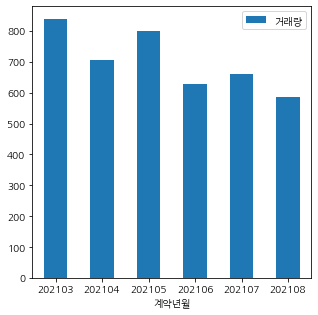

In [20]:
test1.plot( kind='bar',label='거래량')
plt.xlabel('계약년월')
plt.rcParams['figure.figsize'] = (5, 5)
plt.legend()
plt.xticks(rotation=0)

In [223]:
gb2 = df.groupby(by='거래금액(만원)')
gb2

In [224]:
gb2=df['거래금액(만원)'].value_counts()
print(gb2)

32000     84
35000     73
29000     58
28000     58
30000     57
          ..
34490      1
95500      1
97000      1
154000     1
33350      1
Name: 거래금액(만원), Length: 698, dtype: int64


In [225]:
gb2

32000     84
35000     73
29000     58
28000     58
30000     57
          ..
34490      1
95500      1
97000      1
154000     1
33350      1
Name: 거래금액(만원), Length: 698, dtype: int64

In [226]:
df[['계약년월','거래금액(만원)']]

,계약년월,거래금액(만원)
0,3,12000
1,3,48800
2,3,19000
3,3,22500
4,3,29000
...,...,...
4213,8,48500
4214,8,68700
4215,8,69200
4216,8,33350


In [274]:
test2=df.groupby('계약년월')[['거래금액(만원)']].sum()
test2

,거래금액(만원)
계약년월,
3,28717300
4,25596540
5,29699995
6,21265590
7,23049305
8,21314459


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8')])

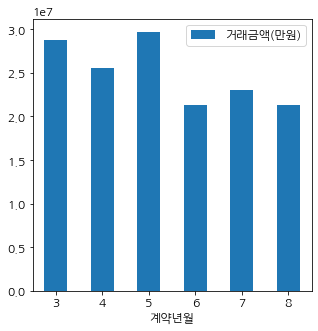

In [275]:
test2.plot( kind='bar')
plt.rcParams['figure.figsize'] = (5, 5)
plt.xticks(rotation=0)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지역        1 non-null      object 
 1   시군구       4218 non-null   object 
 2   단지명       4218 non-null   object 
 3   전용면적      4218 non-null   float64
 4   계약년월      4218 non-null   int64  
 5   거래금액(만원)  4218 non-null   int64  
 6   평수        4218 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 230.8+ KB


In [331]:
def m(전용면적):
    if math.isnan(전용면적):
        return '미상'
    else:
        firstage = str(int(전용면적))
        if firstage < '70':
            return '10평대'
        if firstage > '70':
            return '20평대'
 
        
    
    

In [332]:
m(69.7500)

'10평대'

In [333]:
df['평수']=df['전용면적'].apply(m)
df.head()

,지역,시군구,단지명,전용면적,계약년월,거래금액(만원),평수
0,대구광역시,남구 대명동,경일맨션,69.75,3,12000,10평대
1,NaN,남구 대명동,교대역동서프라임36.5,76.24,3,48800,20평대
2,NaN,남구 대명동,대명(3007-34),84.98,3,19000,20평대
3,NaN,남구 대명동,동아대덕,84.96,3,22500,20평대
4,NaN,남구 대명동,보성청록타운,84.99,3,29000,20평대


In [334]:
test3=df['평수'].value_counts()
print(test3)

20평대    3787
10평대     357
Name: 평수, dtype: int64


(array([0, 1]), [Text(0, 0, '20평대'), Text(1, 0, '10평대')])

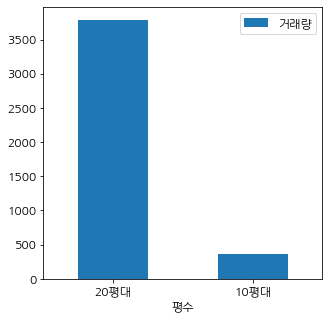

In [335]:
test3.plot( kind='bar',label='거래량')
plt.xlabel('평수')
plt.rcParams['figure.figsize'] = (5, 5)
plt.legend()
plt.xticks(rotation=0)

In [324]:
test0=df[['계약년월','평수']].value_counts()
test0

계약년월  평수  
3     20평     749
5     20평     728
4     20평     641
7     20평     598
6     20평     568
8     20평     503
3     10평대     74
8     10평대     72
5     10평대     57
4     10평대     56
7     10평대     51
6     10평대     47
dtype: int64

In [325]:
test4=test0.sort_index(axis=0, ascending=True)
test4

계약년월  평수  
3     10평대     74
      20평     749
4     10평대     56
      20평     641
5     10평대     57
      20평     728
6     10평대     47
      20평     568
7     10평대     51
      20평     598
8     10평대     72
      20평     503
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '(3, 10평대)'),
  Text(1, 0, '(3, 20평)'),
  Text(2, 0, '(4, 10평대)'),
  Text(3, 0, '(4, 20평)'),
  Text(4, 0, '(5, 10평대)'),
  Text(5, 0, '(5, 20평)'),
  Text(6, 0, '(6, 10평대)'),
  Text(7, 0, '(6, 20평)'),
  Text(8, 0, '(7, 10평대)'),
  Text(9, 0, '(7, 20평)'),
  Text(10, 0, '(8, 10평대)'),
  Text(11, 0, '(8, 20평)')])

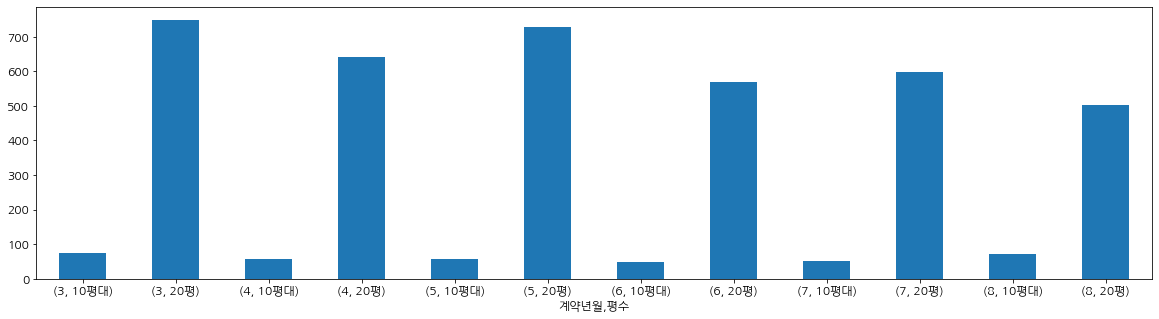

In [337]:
## 월단위 평수별 거래량
test4.plot( kind='bar')
plt.rcParams['figure.figsize'] = (20, 5)

plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8')])

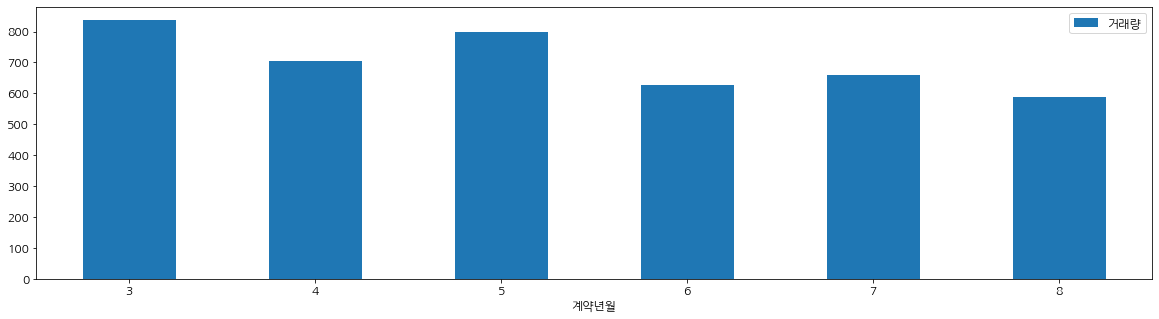

In [328]:
#월단위 거래량
test1.plot( kind='bar',label='거래량')
plt.xlabel('계약년월')
plt.rcParams['figure.figsize'] = (5, 5)
plt.legend()
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8')])

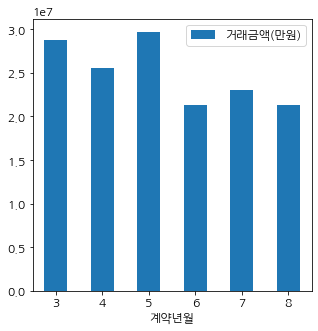

In [329]:
# 월단위 거래금액 합
test2.plot( kind='bar')
plt.rcParams['figure.figsize'] = (5, 5)
plt.xticks(rotation=0)

(array([], dtype=float64), [])

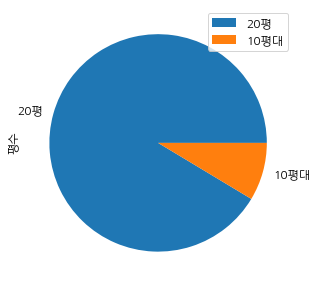

In [330]:
#평수별 거래량
test3.plot( kind='pie')
plt.rcParams['figure.figsize'] = (5, 5)
plt.legend()
plt.xticks(rotation=0)